# Prediction of loan_status
    

* [Getting started with data](#1)
* [Data_Visualization_and_Preprocessing](#2)
* [Feature_Engineering](#3)
* [Modeling](#4)

<a id="1"></a> <br>
# Getting started with data

In [1]:
import warnings
warnings.filterwarnings('ignore')


import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train=pd.read_csv('../input/train-data/loan_train.csv')
train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
train.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [6]:
train.corr()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
Unnamed: 0,1.000000,1.000000,0.032456,0.061522,-0.012264
Unnamed: 0.1,1.000000,1.000000,0.032456,0.061522,-0.012264
Principal,0.032456,0.032456,1.000000,0.521876,-0.060893
terms,0.061522,0.061522,0.521876,1.000000,-0.064762
age,-0.012264,-0.012264,-0.060893,-0.064762,1.000000


We can see that **Unnamed: 0** and **Unnamed: 0.1** are highly correlated.

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Density'>

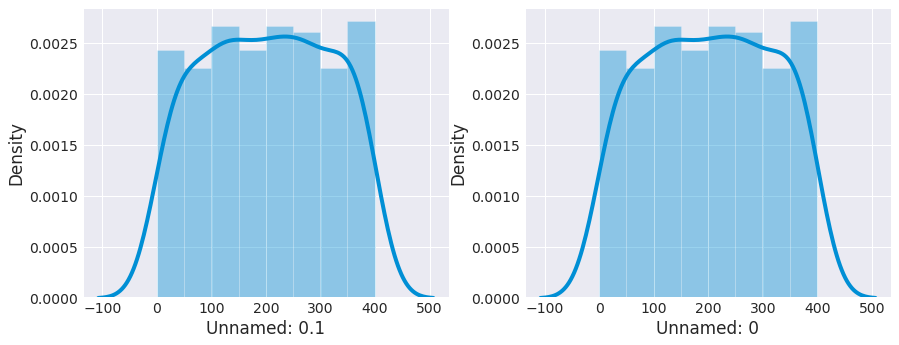

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(train['Unnamed: 0.1'])
plt.subplot(1,3,2)
sns.distplot(train['Unnamed: 0'])

Since,both are depending on each other, those are correlated with each other.<br>
Hence,we can drop any of them

In [8]:
train=train.drop('Unnamed: 0.1',axis=1)

In [9]:
cat_var=['loan_status','Principal','terms','education','Gender']

In [10]:
def value_counts(cat_var):
    each_cols=train[cat_var]
    for i in each_cols:
        print("Number of unique_value in column {} of lenth {} are {}".format(i.upper(),
                                            len(dict(each_cols[i].value_counts())),
                                            dict(each_cols[i].value_counts())))
value_counts(cat_var)

Number of unique_value in column LOAN_STATUS of lenth 2 are {'PAIDOFF': 260, 'COLLECTION': 86}
Number of unique_value in column PRINCIPAL of lenth 5 are {1000: 258, 800: 81, 300: 3, 900: 2, 500: 2}
Number of unique_value in column TERMS of lenth 3 are {30: 184, 15: 148, 7: 14}
Number of unique_value in column EDUCATION of lenth 4 are {'High School or Below': 151, 'college': 149, 'Bechalor': 44, 'Master or Above': 2}
Number of unique_value in column GENDER of lenth 2 are {'male': 294, 'female': 52}


<AxesSubplot:>

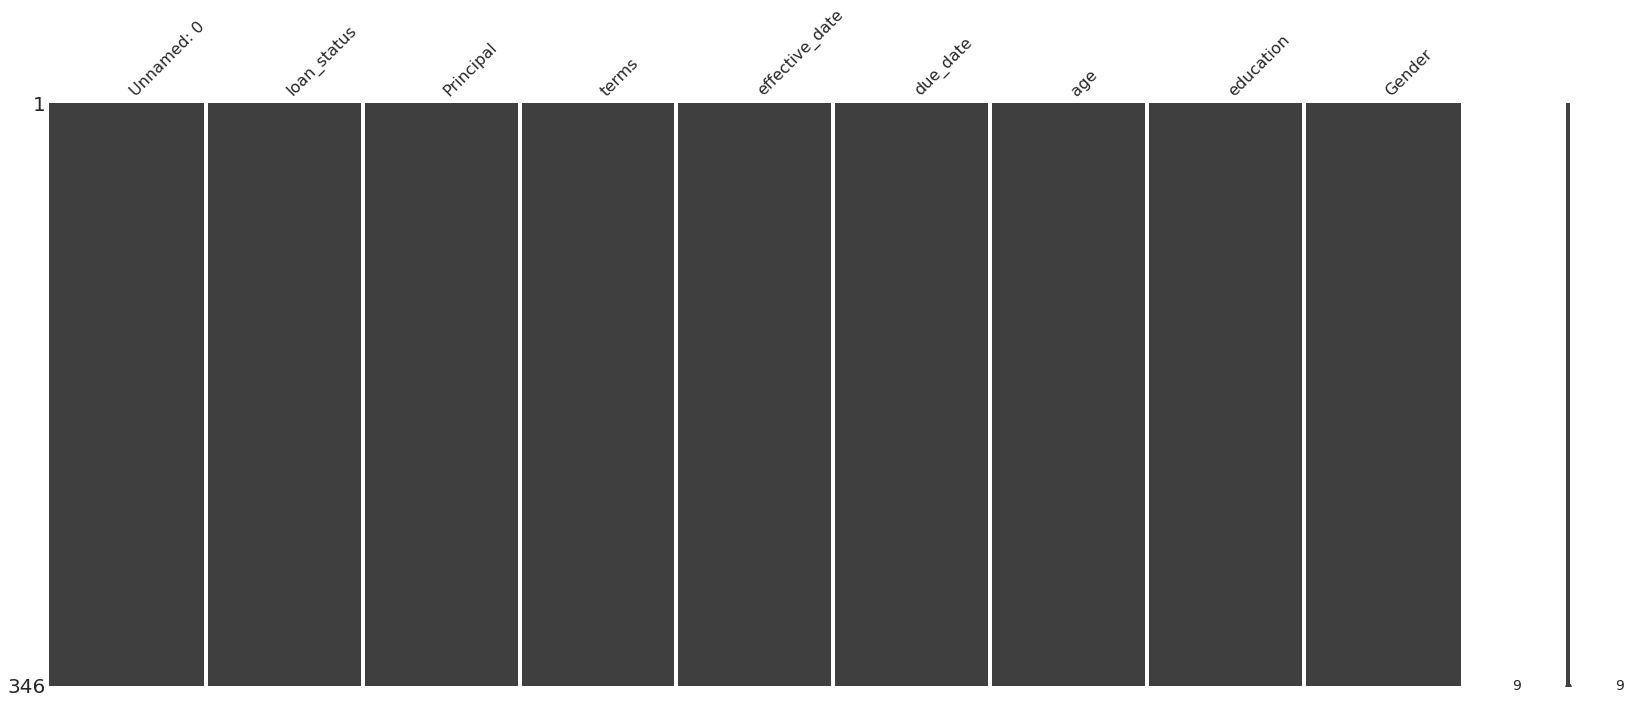

In [11]:
import missingno as mn
mn.matrix(train)

In [12]:
pd.set_option('display.float_format',lambda x:'%.3f' %x)
train.describe()

,Unnamed: 0,Principal,terms,age
count,346.000,346.000,346.000,346.000
mean,202.168,943.642,22.653,30.939
std,115.460,109.426,7.991,6.039
min,0.000,300.000,7.000,18.000
25%,107.250,900.000,15.000,27.000
50%,204.500,1000.000,30.000,30.000
75%,298.750,1000.000,30.000,35.000
max,399.000,1000.000,30.000,51.000


In [13]:
#distribution of categorical features
train.describe(include=["O"])

,loan_status,effective_date,due_date,education,Gender
count,346,346,346,346,346
unique,2,7,23,4,2
top,PAIDOFF,9/11/2016,10/10/2016,High School or Below,male
freq,260,166,90,151,294


<a id="2"></a></br>
# Date Visualization and Preprocessing

## Analyzing Features

**Categorical :** loan_status,education,Gender and **DateTimeFormat :** effective_date,due_date

**Continuous :** age and **discrete :** Principal,terms

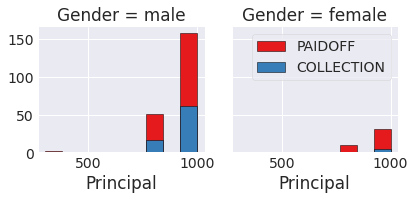

In [14]:
bins=np.linspace(train.Principal.min(),train.Principal.max(),10)
g=sns.FacetGrid(train,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
g.map(plt.hist,'Principal',bins=bins,ec='k')
g.axes[-1].legend()

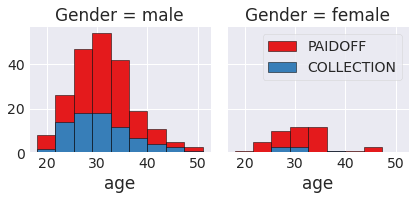

In [15]:
bins=np.linspace(train.age.min(),train.age.max(),10)
g=sns.FacetGrid(train,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
g.map(plt.hist,'age',bins=bins,ec='k')
g.axes[-1].legend()

In [16]:
train['due_date'] = pd.to_datetime(train['due_date'])
train['effective_date'] = pd.to_datetime(train['effective_date'])

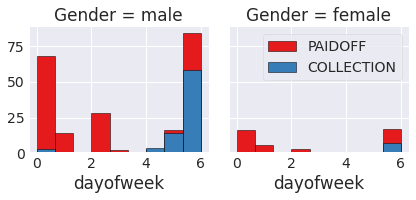

In [17]:
train['dayofweek']=train['effective_date'].dt.dayofweek
bins = np.linspace(train.dayofweek.min(), train.dayofweek.max(), 10)
g = sns.FacetGrid(train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [18]:
train['weekend']=train['dayofweek'].apply(lambda x:1 if (x>3) else 0)
train.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### pivoting features of categorical

In [19]:
train['loan_status']=train['loan_status'].map({'PAIDOFF':1,'COLLECTION':0}).astype(int)

In [20]:
train[['education','loan_status']].groupby(['education'],as_index=False).mean().sort_values(by='loan_status',ascending=False)

,education,loan_status
3,college,0.765
0,Bechalor,0.750
1,High School or Below,0.742
2,Master or Above,0.500


In [21]:
train[['Gender','loan_status']].groupby(['Gender'],as_index=False).mean().sort_values(by='loan_status',ascending=False)

,Gender,loan_status
0,female,0.865
1,male,0.731


<a id="3"></a> <br>
# Feature Engineering

## Converting Categorical features into numerical

In [22]:
#Gender feature
train['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [23]:
train['Gender']=train['Gender'].map({'male':1,'female':0}).astype(int)

In [24]:
train.Gender.unique()

array([1, 0])

In [25]:
#education
train['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [26]:
x=train.groupby(['education'])['loan_status'].mean().sort_values().index

In [27]:
train['education']=train['education'].map({k:i for i,k in enumerate(x,0)})

In [28]:
train.education.unique()

array([1, 2, 3, 0])

In [29]:
train.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1,1000,30,2016-09-08,2016-10-07,45,1,1,3,0
1,2,1,1000,30,2016-09-08,2016-10-07,33,2,0,3,0
2,3,1,1000,15,2016-09-08,2016-09-22,27,3,1,3,0
3,4,1,1000,30,2016-09-09,2016-10-08,28,3,0,4,1
4,6,1,1000,30,2016-09-09,2016-10-08,29,3,1,4,1


### Treating outliers

herer we have only **age** feature as continuous variable

In [30]:
import scipy.stats as stats

Text(0.5, 1.0, 'Histogram')

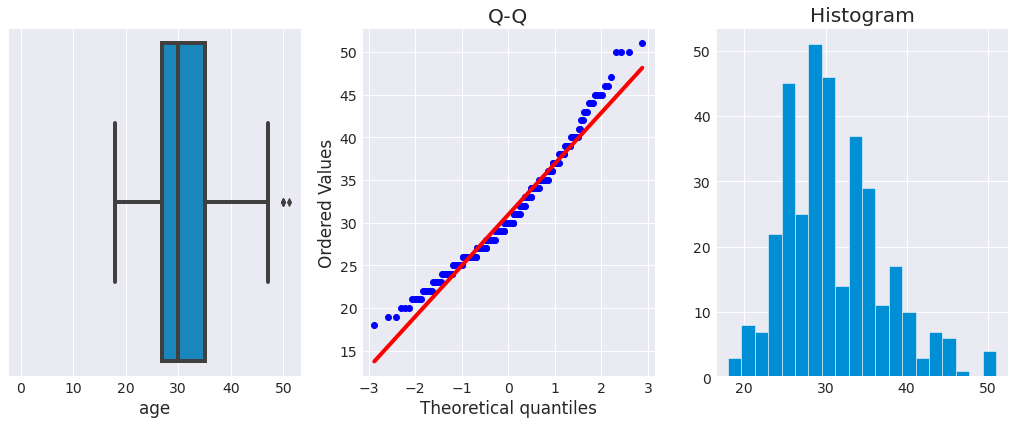

In [31]:
#diagnostic of age

plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.boxplot(train.age)
plt.plot('boxplot')

plt.subplot(1,3,2)
stats.probplot(train.age,dist='norm',plot=plt)
plt.title('Q-Q')

plt.subplot(1,3,3)
plt.hist(train.age,bins=20)
plt.title('Histogram')

In [32]:
lower_bound=0.065
upper_bound=0.95

lower=train['age'].quantile(lower_bound)
upper=train['age'].quantile(upper_bound)

In [33]:
train['age']=np.where(train['age']<lower,lower,np.where(train['age']>upper,upper,train['age']))

<AxesSubplot:xlabel='age'>

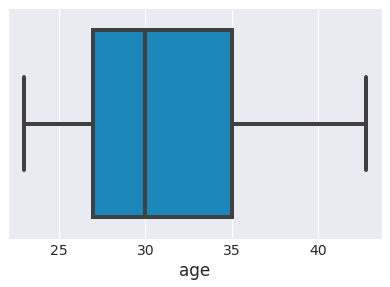

In [34]:
sns.boxplot(train.age)

Text(0.5, 1.0, 'Histogram')

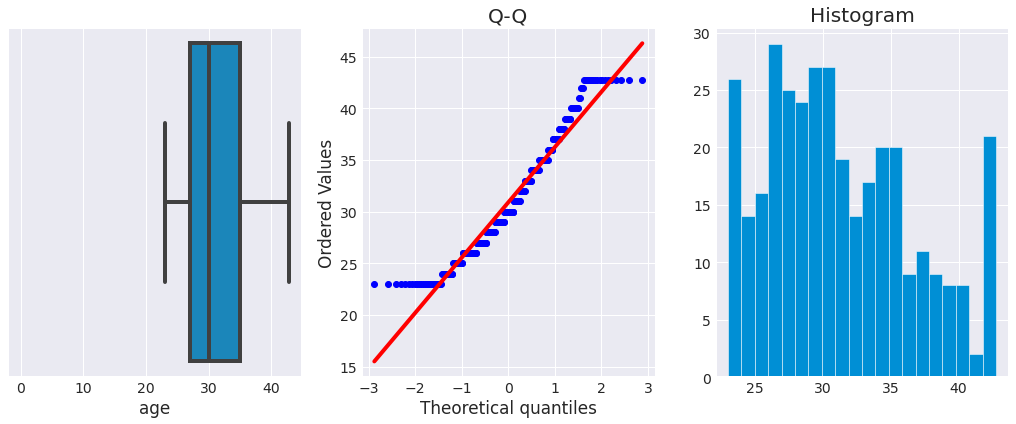

In [35]:
#diagnostic of age

plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.boxplot(train.age)
plt.plot('boxplot')

plt.subplot(1,3,2)
stats.probplot(train.age,dist='norm',plot=plt)
plt.title('Q-Q')

plt.subplot(1,3,3)
plt.hist(train.age,bins=20)
plt.title('Histogram')

###  Features Selection

In [36]:
train.columns

Index(['Unnamed: 0', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'age', 'education', 'Gender', 'dayofweek', 'weekend'],
      dtype='object')

In [37]:
train=train[['Principal','terms','age','Gender','education','weekend','loan_status']]

In [38]:
X=train.drop('loan_status',axis=1).values
y=train.loan_status.values

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,accuracy_score

<a id="4"></a><br>
# Modeling

## KNeighborsClassifier

In [42]:
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(y_test==yhat)//np.sqrt(yhat.shape[0])
    
mean_acc

array([0.71153846, 0.68269231, 0.75961538, 0.70192308, 0.74038462,
       0.65384615, 0.70192308, 0.66346154, 0.65384615])

In [43]:
mean_acc.argmax()+1

3

In [44]:
print("the best accuracy was with",mean_acc.max(),"with k=",mean_acc.argmax()+1)

the best accuracy was with 0.7596153846153846 with k= 3


In [45]:
neigh=KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
ypred_knn=neigh.predict(X_test)

In [46]:
accuracy_score(y_test,ypred_knn)

0.7596153846153846

## SVC

In [47]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
ypred_svc=svc.predict(X_test)
accuracy_score(y_test,ypred_svc)

0.7403846153846154

## Decision Tree Classifier

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier

In [49]:
pipeline=make_pipeline(DecisionTreeClassifier(criterion='entropy',max_depth=4))
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)

0.7355371900826446

In [50]:
pipeline.score(X_test,y_test)

0.7980769230769231

In [51]:
bgclf=BaggingClassifier(base_estimator=pipeline,n_estimators=100,max_samples=10,random_state=1,n_jobs=5)
bgclf.fit(X_train,y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('decisiontreeclassifier',
                                                  DecisionTreeClassifier(criterion='entropy',
                                                                         max_depth=4))]),
                  max_samples=10, n_estimators=100, n_jobs=5, random_state=1)

In [52]:
bgclf.score(X_train,y_train)

0.7355371900826446

In [53]:
bgclf.score(X_test,y_test)

0.7980769230769231

We can decide our model as Decision Tree Classifier

In [54]:
y_pred=bgclf.predict(X_test)

In [55]:
accuracy_score(y_pred,y_test)

0.7980769230769231